<a href="https://colab.research.google.com/github/DanielaNavaGarcia/Ecuaciones-Diferenciales-Parciales-I/blob/main/Polinomios_de_Legendre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

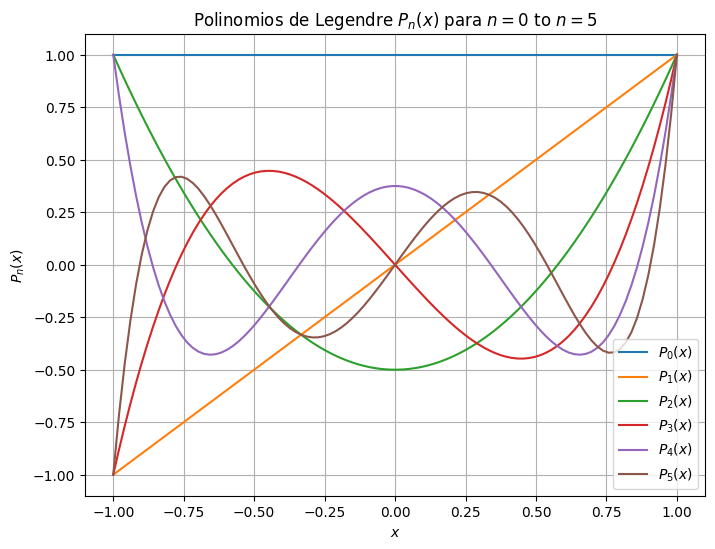

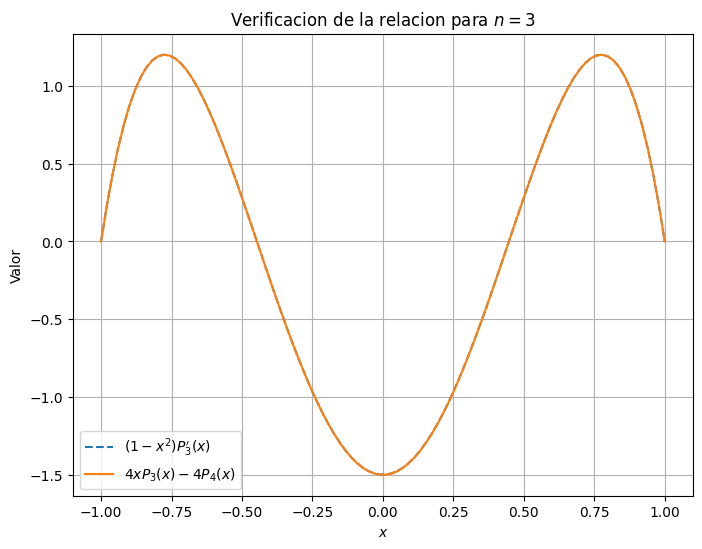

Diferencia (debe ser 0): 0
Expresion (debe ser 0): 0
n = 0, Diferencia (debe ser 0): 0
n = 1, Diferencia (debe ser 0): 0
n = 2, Diferencia (debe ser 0): 0
n = 3, Diferencia (debe ser 0): 0
n = 4, Diferencia (debe ser 0): 0
n = 5, Diferencia (debe ser 0): 0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre
import sympy as sp

# definiendo las variables simbolicas
x = sp.Symbol('x')
n = sp.Symbol('n', integer=True)

# Matriz de valores x para graficar
x_vals = np.linspace(-1, 1, 100)

# Trazando
plt.figure(figsize=(8, 6))
for i in range(6):
    Pn = legendre(i) # Polinomio legendre de grado i
    plt.plot(x_vals, Pn(x_vals), label=f'$P_{i}(x)$')

plt.title('Polinomios de Legendre $P_n(x)$ para $n=0$ to $n=5$')
plt.xlabel('$x$')
plt.ylabel('$P_n(x)$')
plt.legend()
plt.grid(True)
plt.show()

# Calculando P_3(x) y P_4(x)
P3 = legendre(3)
P4 = legendre(4)

# Calculando numericamente la derivada P_3(x)


# Utilizando no.gradient para la diferenciacion numerica
P3_vals = P3(x_vals)
P3_deriv = np.gradient(P3_vals, x_vals)

# Lado izquierdo: (1 - x^2) * P_3'(x)
lhs = (1 - x_vals**2) * P3_deriv

# Lado derecho: 4x P_3(x) - 4 P_4(x)
rhs = 4 * x_vals * P3(x_vals) - 4 * P4(x_vals)

# Graficando ambos lados
plt.figure(figsize=(8, 6))
plt.plot(x_vals, lhs, label='$(1 - x^2) P_3\'(x)$', linestyle='--')
plt.plot(x_vals, rhs, label='$4x P_3(x) - 4 P_4(x)$', linestyle='-')
plt.title('Verificacion de la relacion para $n=3$')
plt.xlabel('$x$')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()


# Definiendo una funcion para P_n(x) simbolicamente usando SymPy
def legendre_poly(n, x):
    return sp.simplify(sp.functions.special.polynomials.legendre(n, x))

# Calculando P_3(x) y P_4(x)
P3_sym = legendre_poly(3, x)
P4_sym = legendre_poly(4, x)

# Calculando la derivada de P_3(x)
P3_deriv_sym = sp.diff(P3_sym, x)

# Lado izquierdo: (1 - x^2) * P_3'(x)
lhs_sym = (1 - x**2) * P3_deriv_sym

# Lado derecho: 4x P_3(x) - 4 P_4(x)
rhs_sym = 4 * x * P3_sym - 4 * P4_sym

# Simplificando ambos lados y comprobamos si son iguales
diff = sp.simplify(lhs_sym - rhs_sym)
print(f"Diferencia (debe ser 0): {diff}")


# Calculando P_2(x), P_3(x), y P_4(x)
P2_sym = legendre_poly(2, x)
P3_sym = legendre_poly(3, x)
P4_sym = legendre_poly(4, x)

# Calculando la expresion: 4 P_4(x) - 7 x P_3(x) + 3 P_2(x)
expr = 4 * P4_sym - 7 * x * P3_sym + 3 * P2_sym

# Simplificando la expresion
result = sp.simplify(expr)
print(f"Expresion (debe ser 0): {result}")


for i in range(6):
    # Calculando (x^2 - 1)^n
    f = (x**2 - 1)**i

    # Calculando la n-esima derivada
    f_deriv = sp.diff(f, x, i)

    # Aplicando la formula de Rodriguez: (1 / (2^n n!)) * derivada
    Pn_rodrigues = (1 / (2**i * sp.factorial(i))) * f_deriv

    # Calcular P_n(x) directamente usando SymPy
    Pn_sym = legendre_poly(i, x)

    # Simplificando y comparando
    diff = sp.simplify(Pn_rodrigues - Pn_sym)
    print(f"n = {i}, Diferencia (debe ser 0): {diff}")